In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from utils import dataset, distance, error, regression, split
np.seterr('raise')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

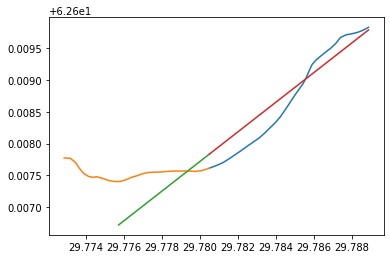

In [2]:
target_trajectory, data = dataset.load_users_trajectories_with_target(898, 1393786760018)
head, tail = split.split_trajectory_with_overlap(target_trajectory, 0.5)

head_x, head_y = head[:, 0], head[:, 1]
tail_x, tail_y = tail[:, 0], tail[:, 1]

slope, intercept, _r_value, _p_value, _std_err = linregress(head_y, head_x)
regression_line = np.array(list(zip(intercept + slope * head_y, head_y)))
reg_x, reg_y = regression_line[:, 0], regression_line[:, 1]

prediction = regression.predict_with_linear_regression(head, 60)
pred_x, pred_y = prediction[:, 0], prediction[:, 1]

plt.plot(head_y[-32:], head_x[-32:])
plt.plot(tail_y[:32], tail_x[:32])
plt.plot(pred_y, pred_x)
plt.plot(reg_y[-32:], reg_x[-32:])
plt.show()

In [3]:
SECONDS = 60 # 1 minute
USER_ID = 898
RATIO = 0.5
THRESHOLD = 10
trajectory_ids = dataset.get_list_of_users_trajectory_ids(USER_ID)

errors = []
failed = 0

for trajectory_id in trajectory_ids:
    print(trajectory_id, end='')
    target_trajectory, data = dataset.load_users_trajectories_with_target(USER_ID, trajectory_id)
    head, tail = split.split_trajectory_with_overlap(target_trajectory, RATIO)
    prediction = regression.predict_with_linear_regression(head, SECONDS)

    if np.size(prediction, 0) < 2:
        failed += 1
        print(' failed')
        continue

    pred_dist = distance.calculate_trajectory_length_in_meters(prediction)

    if len(prediction) > 0 and np.size(prediction, 0) > 0 and np.size(prediction, 1) == 4 and pred_dist > 0:
        error_amount = error.calculate_error_vector(tail, prediction)[:, 4]
        errors.append(error_amount)
        print(' success', pred_dist, len(error_amount), sum(error_amount))
    else:
        failed += 1
        print(' failed')

errors_sum = list(map(sum, errors))

print(
    '\nERROR STATISTICS',
    '\naverage\t\t\t', np.average(errors_sum),
    '\nmedian\t\t\t', np.median(errors_sum),
    '\nstandard deviation\t', np.std(errors_sum),
    '\nfailed predictions\t', failed
)

1399399033400 success 75.62412782391849 14 200.15514739866518
1412515702026 success 227.4881606114867 14 2532.3073713784597
1413382616849 success 52.84287918722966 14 779.3981519754401
1379951571859 success 131.5965851502636 29 3021.159377388417
1379694392068 success 247.76607719402563 31 2362.380268532677
1407168712392 success 8.016947911039027 14 1998.3349183626979
1400436362445 success 221.80168355453176 14 469.81581858135974
1407593205810 success 112.7896455735127 14 3015.2331132892664
1396953544784 success 215.52567722297147 15 2740.822842916642
1408208026280 success 309.7887707567973 14 2778.6461532260514
1404054152819 success 87.49545783609183 14 3642.1418656631254
1401891357857 success 157.7351209743506 14 2918.1391721511004
1394042416405 success 73.98620549303762 14 482.8094196744085
1380211927794 success 51.532043129420416 28 933.6910597500621
1377681725292 success 236.26302486422213 20 518.676605725989
1397840479593 success 770.8334663439604 14 23573.94636729717
139893071636

1408813293405 success 189.04143590581296 14 1070.262993194356
1400519431875 failed
1379098900868 success 167.9000063202913 29 7685.1592494448305
1377680083728 success 124.67767558753275 29 8852.045822814807
1397841024653 success 1103.7531817876497 14 5930.275909955264
1400515258502 success 115.24446502137776 14 570.8615408657768
1396198039382 success 229.63941786210938 14 853.8885407123529
1377973704344 success 132.4787190894953 26 2525.2805370393994
1396436302283 success 238.46220043678608 14 5127.002662425879
1399118637264 failed
1377987971670 success 48.00279561033903 30 883.2965033057271
1413379622135 success 59.966833042303826 14 5353.1372681455005
1399051057915 success 83.03166090366331 14 1604.858339588461
1422295829394 success 66.3641839585645 14 5661.244757497976
1396347582049 success 120.92748180072402 14 6809.146376770912
1385723026567 success 1843.397017868991 14 10211.415466269205
1419824618517 success 40.598021815451716 14 425.14020466210036
1422483568270 failed
140091378